# Determinant QMC data visualization

## Are you testing or making plots?

In [33]:
SAVEPLOTS = True

## Load simulation data

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
cwd = os.getcwd()
import seaborn as sns
sns.set()
sns.set_palette("Blues_r")
sns.set_style("white")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

NSITES = 6
dt = 0.03125
beta = 1.
L = 32
t = 1.
U = 4.
mu = 0.
totalMCSweeps = 10128
freq = 4
intsize = 8
geom = 1
ny = 0

mainDir = ('../data/' + str(NSITES) + \
             'sites_L=' + str(L) + \
             '_beta=' + str(beta) + \
             '_dt_' + str(dt) + '_t_' + \
             str(t) + '_U_'+ str(U) + '_mu_' + str(mu))

simDir = (mainDir + '/data-to-reproduce/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

plotDir = (mainDir + '/plots/' + \
              'totalMCSweeps_' + str(totalMCSweeps) + \
              '_freq_' + str(freq) + '_intsize_' + str(intsize) + \
              '_geom_' + str(geom) + '_ny_' + str(ny) )

# Load weights to plot

weights = np.loadtxt(simDir + '/Log-weights.csv')

WL = weights.size

latSweeps = np.arange(WL) + 1

# Metropolis Sampling convergence

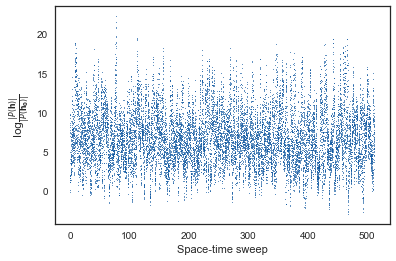

In [37]:
plt.scatter(latSweeps / L, weights, s = 0.3) #show time in space-time sweeps
plt.xlabel(r"Space-time sweep")
plt.ylabel(r'$\log \frac{| P(\mathbf{h}) | }{ | P(\mathbf{h_0}) | } $')
if SAVEPLOTS == True:
    plt.savefig(plotDir + '/Log-weights.png', dpi = 600)

# Magnetic structure factor $S(\mathbf q) = \frac{1}{N} \sum_{i, j} e^{i \mathbf q \cdot  (\mathbf i - \mathbf j)} \left\langle \mathbf S_{\mathbf i} \cdot \mathbf S_{\mathbf j} \right\rangle $

In [38]:
magCorr = np.loadtxt(simDir + '/EqTimeSzCorrelations.csv')

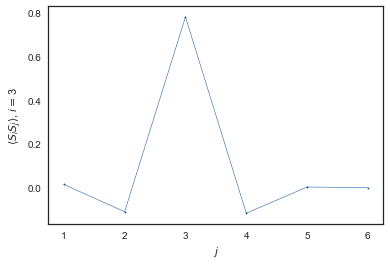

In [39]:
plt.scatter( NSITES - np.arange(NSITES), magCorr[int(NSITES/2), :], s = 2, marker = 'o')
plt.plot( NSITES - np.arange(NSITES), magCorr[int(NSITES/2), :], linewidth = 0.5)
plt.xlabel(r'$j$')
plt.ylabel(r'$\left\langle S_i S_j \right\rangle$, $i = $' + str(int(NSITES/2)))
if SAVEPLOTS == True:
    plt.savefig(plotDir + '/magCorr.png', dpi = 600)

## Fourier transform to obtain the structure factor    

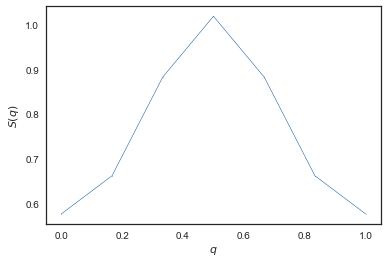

In [40]:
n_qs = NSITES
qMax = 2*np.pi
qs = np.arange(0, qMax + qMax/n_qs, qMax/n_qs)
S = np.zeros(n_qs+1)

for idx, q in enumerate(qs):
    for x in range(NSITES):
        for y in range(NSITES):
            S[idx] += np.cos((x - y) * q ) * magCorr[x, y]

S /=  (NSITES) # factor of 16 comes from 1/2 spins and overcounting

plt.plot(qs/2/np.pi, S, linewidth = 0.5, markersize = 0.5, marker = 'o')
plt.xlabel(r'$q$')
plt.ylabel(r'$S(q)$')
if SAVEPLOTS == True:
    plt.savefig(plotDir + '/S(q).png', dpi = 600)

### Antiferromagnetic order

It has a maximum at $q = \pi$ signaling quasi-AF order

In [41]:
print("Maximum of S(q): ", qs[np.argmax(S)])

Maximum of S(q):  3.14159265359


## A comparison that could be useful

By the definition of the ZZ magnetic susceptibility

$\chi(\mathbf q) = \frac{1}{N} \sum_{i, j} e^{i \mathbf q \cdot  (\mathbf i - \mathbf j)} \int_0^\beta \left\langle \mathbf S_{\mathbf i}(\tau) \cdot \mathbf S_{\mathbf j}(0) \right\rangle d\tau $

we obtain an important identity

$\chi ( 0 ) = \beta S ( 0 ) ,$

which we used to check whether our results are consistent.

Unequal-time measurements are more prone to fluctuations and thus there are minor variations due to higher variance of the corresponding estimators.

In [42]:
print("beta S (0): ", S[0] * beta)

beta S (0):  0.577018159447


## Comparison with QUEST (60 sites)

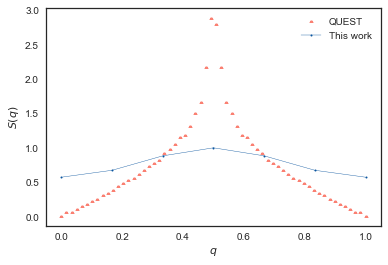

In [28]:
s_compare = np.loadtxt("S(q).csv")
Squest = np.concatenate((s_compare\
                         , np.flip(s_compare, axis = 0)[2:]))
fig = plt.figure(0)
ax = fig.add_subplot(111)
plt.xlabel(r'$q$')
plt.ylabel(r'$S(q)$')
plt.plot(np.linspace(0, 1, num=60), Squest, linewidth = 0,\
         markersize = 0.8, marker = '^', markeredgewidth = 2.2, label = 'QUEST', color = 'salmon')
ax.plot(qs/2/np.pi, S, linewidth = 0.4, label = 'This work', markersize = 2, marker = 'o')
lgd = ax.legend()
if SAVEPLOTS == True:
    plt.savefig(plotDir + '/s_compare.png', dpi = 600, bbox_inches = 'tight')

# Magnetic susceptibility 

$\chi(\mathbf q) = \frac{1}{N} \sum_{i, j} e^{i \mathbf q \cdot  (\mathbf i - \mathbf j)} \int_0^\beta \left\langle \mathbf S_{\mathbf i}(\tau) \cdot \mathbf S_{\mathbf j}(0) \right\rangle d\tau $

Text(0,0.5,'$\\chi ( q )$')

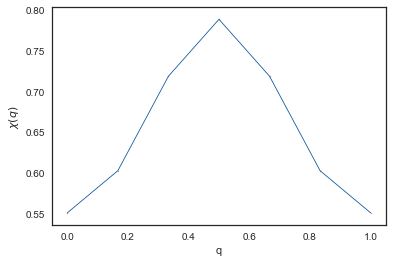

In [29]:
uneqMagCorr = np.loadtxt(simDir + '/UneqTimeSzCorrelations.csv')

n_qs = NSITES
qMax = 2*np.pi
qs = np.arange(0, qMax + qMax/n_qs, qMax/n_qs)

MagSus = np.zeros(n_qs + 1)

for idx, q in enumerate(qs):
    for x in range(NSITES):
        for y in range(NSITES):
            MagSus[idx] += np.cos((x - y) * q) * ( uneqMagCorr[x, y] )
            
MagSus /= NSITES

plt.scatter(qs / 2 / np.pi, MagSus, s = 1.2, color = 'salmon')
plt.plot(qs / 2 / np.pi, MagSus, linewidth = 0.8)
plt.xlabel(r'q')
plt.ylabel(r'$\chi ( q )$')

## $\chi (q = 0 )$ and $\chi (q = \pi )$

In [32]:
print("chi ( 0): ", MagSus[0])
print("chi ( pi): ", MagSus[int(NSITES /2)])

chi ( 0):  0.550294370887
chi ( pi):  0.788282303458
